In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.inspection import DecisionBoundaryDisplay

In [6]:
df = pd.read_csv("Dataset4/dataset4.csv")

In [7]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [16]:
X = df[['amount', 'newbalanceDest']]
y = df['isFlaggedFraud']
X = np.array(X)

# count 0 and 1
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))

target_names = ['not fraud', 'fraud']
target_names = np.reshape(target_names, (1,-1))[0]
target_names
print(X)
print(y)

{0: 6362604, 1: 16}
[[9.83964000e+03 0.00000000e+00]
 [1.86428000e+03 0.00000000e+00]
 [1.81000000e+02 0.00000000e+00]
 ...
 [6.31140928e+06 6.37989811e+06]
 [8.50002520e+05 0.00000000e+00]
 [8.50002520e+05 7.36010163e+06]]
0          0
1          0
2          0
3          0
4          0
          ..
6362615    0
6362616    0
6362617    0
6362618    0
6362619    0
Name: isFlaggedFraud, Length: 6362620, dtype: int64


In [17]:
# Train Test split 
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 70)
#train decision tree

clf = DecisionTreeClassifier() #clf to denote classifier
clf.fit(X,y)
print(X_train.shape)

(4453834, 2)


In [22]:
#evaluation on training data

y_pred = clf.predict(X_train)

print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[4453822       0]
 [      3       9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4453822
           1       1.00      0.75      0.86        12

    accuracy                           1.00   4453834
   macro avg       1.00      0.88      0.93   4453834
weighted avg       1.00      1.00      1.00   4453834



In [19]:
#evaluation on test data

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1908782       0]
 [      0       4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1908782
           1       1.00      1.00      1.00         4

    accuracy                           1.00   1908786
   macro avg       1.00      1.00      1.00   1908786
weighted avg       1.00      1.00      1.00   1908786



Text(0.5, 1.0, '2-Class classification with Decision Tree- Training Data')

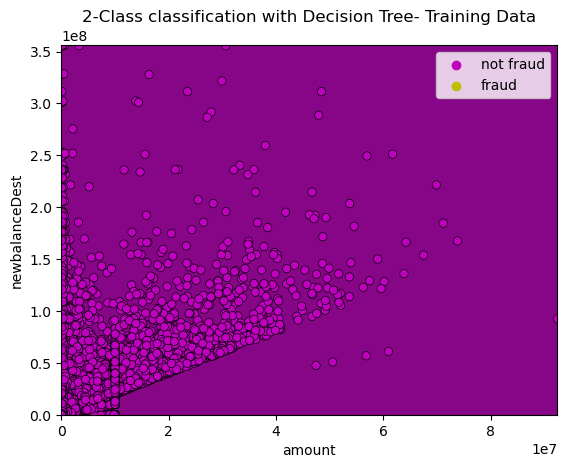

In [20]:
# Plot the decision boundary

# Create color maps
cmap_boundary = ListedColormap(["#870587","#a5a50d"])
cmap_scatter = ["m","y"] 

DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=cmap_boundary, #add colortheme
    response_method="predict",
    xlabel='amount',
    ylabel='newbalanceDest',
)

# Plot training data

sns.scatterplot(
        x=X_train[:, 0],
        y=X_train[:, 1],
        hue=target_names[y_train],
        palette=cmap_scatter,
        alpha=1.0,
        edgecolor="black",
    )

plt.title("2-Class classification with Decision Tree- Training Data")

Text(0.5, 1.0, '2-Class classification with Decision Tree- Training Data')

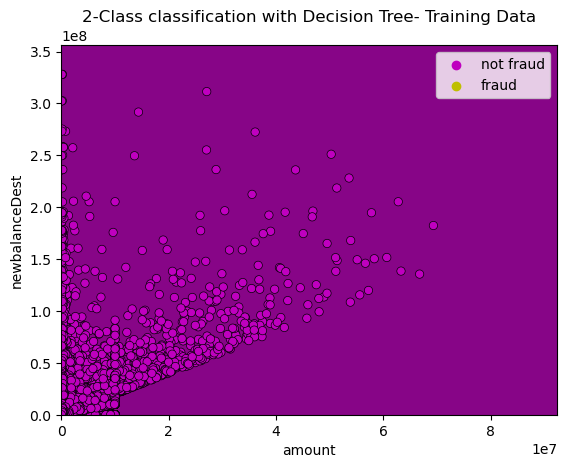

In [21]:
# Plot the decision boundary

# Create color maps
cmap_boundary = ListedColormap(["#870587","#a5a50d"])
cmap_scatter = ["m","y"] 

DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=cmap_boundary, #add colortheme
    response_method="predict",
    xlabel='amount',
    ylabel='newbalanceDest',
)

# Plot testing data

sns.scatterplot(
        x=X_test[:, 0],
        y=X_test[:, 1],
        hue=target_names[y_test],
        palette=cmap_scatter,
        alpha=1.0,
        edgecolor="black",
    )

plt.title("2-Class classification with Decision Tree- Training Data")